In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/apd2599/Training_2021_CIRCUIT/main/Cardio/cardio_train.csv', sep=';', index_col='id')

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
for col in df.columns:
    print(df[col])

id
0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
99993    19240
99995    22601
99996    19066
99998    22431
99999    20540
Name: age, Length: 70000, dtype: int64
id
0        2
1        1
2        1
3        2
4        1
        ..
99993    2
99995    1
99996    2
99998    1
99999    1
Name: gender, Length: 70000, dtype: int64
id
0        168
1        156
2        165
3        169
4        156
        ... 
99993    168
99995    158
99996    183
99998    163
99999    170
Name: height, Length: 70000, dtype: int64
id
0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
99993     76.0
99995    126.0
99996    105.0
99998     72.0
99999     72.0
Name: weight, Length: 70000, dtype: float64
id
0        110
1        140
2        130
3        150
4        100
        ... 
99993    120
99995    140
99996    180
99998    135
99999    120
Name: ap_hi, Length: 70000, dtype: int64
id
0         80
1         90
2         7

In [6]:
df_cont = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_cont)
x_scaled

array([[0.58807588, 0.57948718, 0.27368421, 0.01607916, 0.01355014],
       [0.73015873, 0.51794872, 0.39473684, 0.01793445, 0.01445348],
       [0.6240031 , 0.56410256, 0.28421053, 0.01731602, 0.01264679],
       ...,
       [0.64018583, 0.65641026, 0.5       , 0.02040816, 0.01445348],
       [0.90073558, 0.55384615, 0.32631579, 0.01762523, 0.01355014],
       [0.75431669, 0.58974359, 0.32631579, 0.01669759, 0.01355014]])

In [8]:
df_scaled = pd.DataFrame(x_scaled, columns=['age', 'height', 'weight', 'ap_hi', 'ap_lo'])
#df_scaled.rename(columns={"0": "age", "1": "height", "2": "weight", "3": "ap_hi", "4": "ap_lo"})
#df_scaled.columns
df_scaled

,age,height,weight,ap_hi,ap_lo
0,0.588076,0.579487,0.273684,0.016079,0.013550
1,0.730159,0.517949,0.394737,0.017934,0.014453
2,0.624003,0.564103,0.284211,0.017316,0.012647
3,0.528455,0.584615,0.378947,0.018553,0.015357
4,0.516918,0.517949,0.242105,0.015461,0.011743
...,...,...,...,...,...
69995,0.653659,0.579487,0.347368,0.016698,0.013550
69996,0.913899,0.528205,0.610526,0.017934,0.014453
69997,0.640186,0.656410,0.500000,0.020408,0.014453
69998,0.900736,0.553846,0.326316,0.017625,0.013550


<AxesSubplot:>

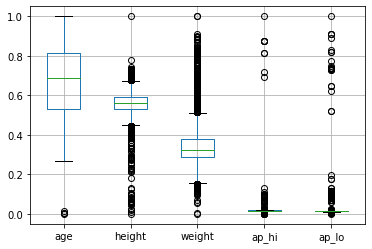

In [9]:
df_scaled.boxplot(column=['age', 'height', 'weight', 'ap_hi', 'ap_lo'])

In [10]:
ap_hi_filter = (df_scaled["ap_hi"] > 0.4)
ap_lo_filter = (df_scaled["ap_lo"] > 0.4) 

In [11]:
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = df[outlier_filter]

/Users/andresperez-doval/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

# Implementation on kaggle

https://www.kaggle.com/benanakca/comparison-of-classification-disease-prediction

In [ ]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(df):
    x_std = df.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(df)
x_std.head()